In [ ]:
import json
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt

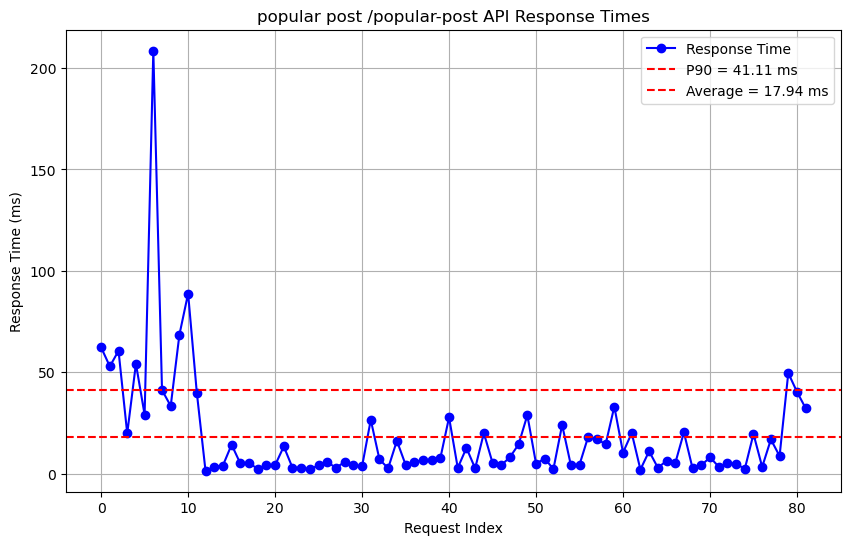

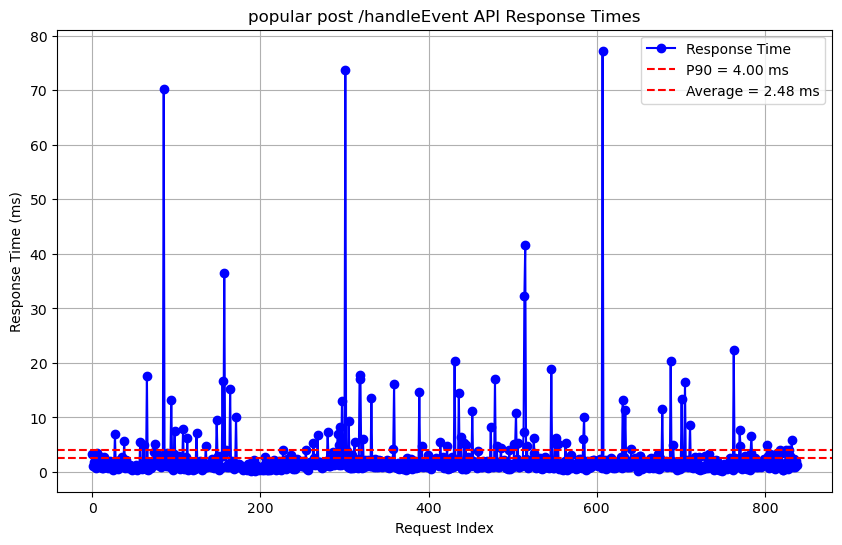

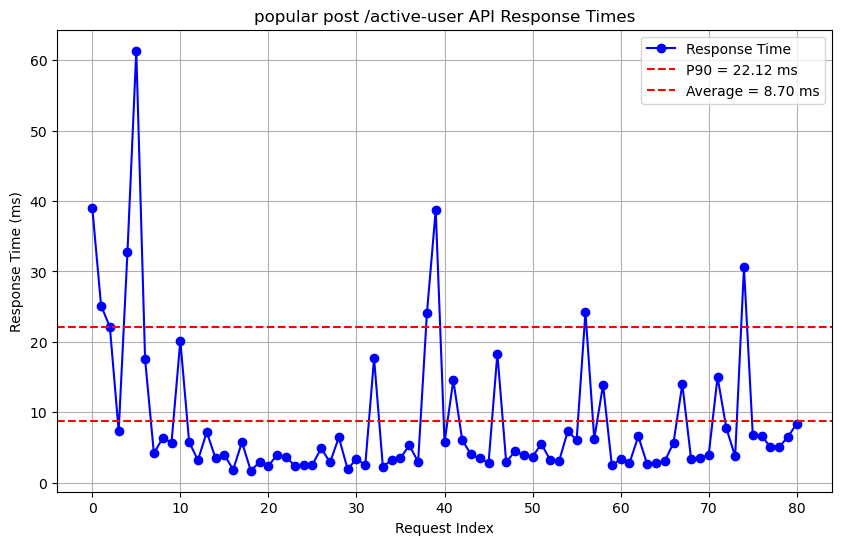

In [30]:


api_url = 'http://localhost:3000/api/response-time?path='

# Fetch the data from the API
param = ['/popular-post', '/handleEvent', '/active-user']
i = 0
while(i < 3):
    url = api_url + param[i]
    response = requests.get(url)
    if response.status_code == 200:
        # Load JSON data
        events = response.json()

        # Extract response times
        response_times = [event['time'] for event in events]

        # Calculate P90
        p90 = np.percentile(response_times, 90)
        # plotting average response time

        average_response_time = np.mean(response_times)

        # Plot the response times
        plt.figure(figsize=(10, 6))
        plt.plot(response_times, marker='o', linestyle='-', color='b', label='Response Time')
        plt.axhline(y=p90, color='r', linestyle='--', label=f'P90 = {p90:.2f} ms')
        plt.axhline(y=average_response_time, color='r', linestyle='--', label=f'Average = {average_response_time:.2f} ms')
        plt.title('popular post ' + param[i]+ ' API Response Times')
        plt.xlabel('Request Index')
        plt.ylabel('Response Time (ms)')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print('response not correct')    
    i = i + 1
